# Small Multi - Image Classification Using Convolutional Neural Network (CNN)

## Importing Packages

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, datasets
import numpy as np
import matplotlib.pyplot as plt
import random


## Load the Dataset

In [2]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
y_test = y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## Plotting Images

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [8]:
# idx = random.randint(0, len(classes) - 1)
# plt.imshow(X_train[idx, :] * 255, cmap="gray")
# plt.figure(figsize = (15,2))
# plt.xlabel(classes[idx ])
# plt.show

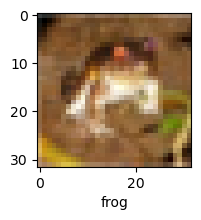

In [9]:
plot_sample(X_train, y_train, 0)

## Normalizing

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# CNN Model

In [42]:
cnn = models.Sequential([
# 1. first layer 
                layers.Conv2D(filters=32, kernel_size = (3,3), activation='relu',input_shape=(32,32,3)),
                layers.MaxPooling2D((2,2)),
                
                layers.Conv2D(filters=64, kernel_size = (3,3), activation='relu'),
                layers.MaxPooling2D((2,2)),
#                 layers.Dropout(0.4),


    
                layers.Conv2D(filters=128, kernel_size = (3,3), activation='relu'),
                layers.BatchNormalization(scale=False, center=True),
                layers.MaxPooling2D((2,2)),
    
            
                
                

# dense
                layers.Flatten(),
                layers.Dense(64, activation = "relu"),
                layers.Dense(10, activation = "softmax")
])

In [43]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])

In [ ]:
cnn.fit(X_train, y_train, epochs = 20)

Epoch 1/20
 730/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3550 - loss: 1.7753

In [15]:
cnn.evaluate(X_test,y_test,1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 466us/step - accuracy: 0.7213 - loss: 1.3728


[1.4209721088409424, 0.7150999903678894]

## Prediction of Model and Original Image

In [16]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[4.75977751e-04, 3.12304946e-05, 2.39681885e-05, 2.32316175e-04,
        4.99097030e-09, 2.19434209e-04, 1.25631038e-06, 8.83110252e-10,
        9.99015689e-01, 9.53765991e-08],
       [1.17582313e-04, 9.35783982e-01, 2.21638876e-14, 1.62280658e-11,
        1.98021586e-15, 1.17210552e-18, 7.05860017e-17, 1.93696123e-12,
        6.40982613e-02, 1.97086607e-07],
       [7.05085753e-04, 1.85562205e-02, 5.42185541e-09, 3.04265882e-07,
        8.47020301e-11, 3.92078287e-10, 5.85151760e-10, 1.03761195e-08,
        9.80648518e-01, 8.97693244e-05],
       [9.99516726e-01, 2.94269732e-04, 1.51580985e-04, 3.92650281e-06,
        1.43822881e-05, 9.77390183e-11, 8.13845866e-11, 6.35446973e-11,
        1.78843547e-05, 1.13631700e-06],
       [2.40716874e-11, 3.62504943e-10, 4.35667971e-05, 2.93266785e-05,
        8.37096691e-01, 8.81422793e-08, 1.62830323e-01, 7.25521292e-12,
        5.12667853e-10, 2.67807249e-10]], dtype=float32)

In [17]:
# y_classes = [np.argmax(element) for element in y_pred]
# or
y_classes = np.argmax(y_pred, axis=1)

y_classes[:5]

array([8, 1, 8, 0, 4])

Model says its a : frog


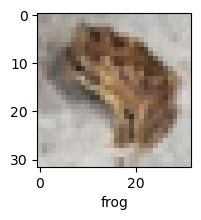

In [31]:
a = random.randint(0,9999)
plot_sample(X_test, y_test,a)

print("Model says its a :",classes[y_classes[a]])